<a href="https://colab.research.google.com/github/MutugiD/Data-Problems/blob/master/Stock_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Autoregressive Integrated Moving Average Model — ARIMA (p, d, q). 

ARIMA (p, d, q) is a natural extension to the class of ARMA models, commonly used for financial data regression. ARIMA models can reduce a non-stationary series to a stationary series using a sequence of differences. ARIMA essentially performs same function, but does so repeatedly, d times, in order to reduce a non-stationary series to a stationary one. 

In [17]:
#import relevant libraries
#for stock information retrieval, data analysis, plotting, regression modelling and feature engineering
#regression models- ARIMA(autoARIMA) and SARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
import warnings 
warnings.filterwarnings('ignore')

In [18]:
ticker = 'MSFT'
start_date= '2000-1-1'
end_date = '2015-12-31'
database = 'yahoo' #Open data source-YahooFinance.com
stock_data = data.DataReader(ticker, 
                       start=start_date, 
                       end=end_date, 
                       data_source=database) 
stock_data.head(n=10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,59.31250,56.00000,58.68750,58.28125,53228400.0,37.199776
2000-01-04,58.56250,56.12500,56.78125,56.31250,54119000.0,35.943153
2000-01-05,58.18750,54.68750,55.56250,56.90625,64059600.0,36.322121
2000-01-06,56.93750,54.18750,56.09375,55.00000,54976600.0,35.105415
2000-01-07,56.12500,53.65625,54.31250,55.71875,62013600.0,35.564171
2000-01-10,56.84375,55.68750,56.71875,56.12500,44963600.0,35.823463
2000-01-11,57.12500,54.34375,55.75000,54.68750,46743600.0,34.905945
2000-01-12,54.43750,52.21875,54.25000,52.90625,66532400.0,33.769020
2000-01-13,54.31250,50.75000,52.18750,53.90625,83144000.0,34.407299


In [19]:
#pick closing prices
Close = stock_data[['Adj Close']].copy().rename(columns ={'Adj Close': 'Close' })
weekdays = pd.date_range(start=start_date, end= end_date, freq='B') #stock trade-days 
Close = Close.reindex(weekdays)
df = Close.reindex(weekdays).fillna(Close.rolling(21,min_periods=1).mean()) #fill the NaN with monthly rolling mean stock prices 
df.head(n=5)

,Close
2000-01-03,37.199776
2000-01-04,35.943153
2000-01-05,36.322121
2000-01-06,35.105415
2000-01-07,35.564171


Autoregressive Integrated Moving Average Model — ARIMA (p, d, q) is a natural extension to the class of ARMA models, commonly used for financial data regression. ARIMA models can reduce a non-stationary series to a stationary series using a sequence of differences.


In [20]:
#split the training and testing data
in_sample = 0.8    #out_sample  = 0.2
train_data, test_data =  df[0:int(len(df)*in_sample)], df[int(len(df)*in_sample):]
train, test = train_data.values, test_data.values
train.shape, test.shape

((3339, 1), (835, 1))

In [21]:
#Optimal ARIMA model (p,d,q)
#Perform stepwise search to minimize aic
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model_fit = model.fit(train)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4477.167, Time=3.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4594.206, Time=0.30 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4476.353, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4475.544, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4592.410, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4477.121, Time=1.32 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4477.265, Time=0.94 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4478.953, Time=1.01 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4473.855, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4475.425, Time=0.36 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=4475.570, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4474.642, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=4477.258, Time=0.35 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 9.297 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3339
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2234.928
Date:                Wed, 11 Nov 2020   AIC                           4473.855
Time:                        18:38:48   BIC                           4486.081
Sample:                             0   HQIC                          4478.229
                               - 3339                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1903      0.009    -21.963      0.000      -0.207      -0.173
sigma2         0.2234      0.002    111.747      0.000       0.219       0.227
===================================================================================
Ljung-Box (Q):                      114.03   Jarque-Bera (JB):             58911.25
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                            -0.98
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
##picking and storing optimal ARIMA order(p,d,q) for regression
import re
summary_string = str(model.summary())
param = re.findall('SARIMAX\(([0-9]+), ([0-9]+), ([0-9]+)',summary_string)
p,d,q = int(param[0][0]) , int(param[0][1]) , int(param[0][2])
p,d,q
   

(0, 1, 1)

In [22]:

#ARIMA regression modelling for out-sample prediction
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(p,d,q))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    observations = test[t]
    history.append(observations)
#mean-square error computation
error = mean_squared_error(test, predictions)
print('Testing Mean Squared Error: %.3f' % error)

Testing Mean Squared Error: 0.320


Text(0, 0.5, 'Prices')

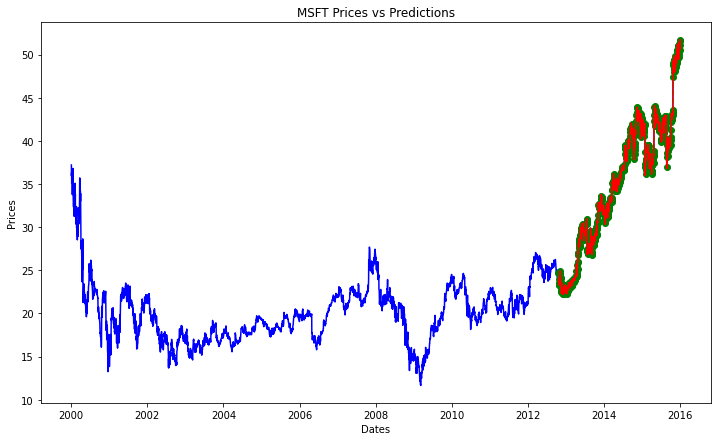

In [15]:
#plot train-data, test-data, and predicted prices
plt.figure(figsize=(12,7))
plt.plot(df['Close'], 'green', color='blue', label='Training data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted prices')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('{} Prices vs Predictions'.format(ticker))
plt.xlabel('Dates')
plt.ylabel('Prices')

Text(0, 0.5, 'Prices')

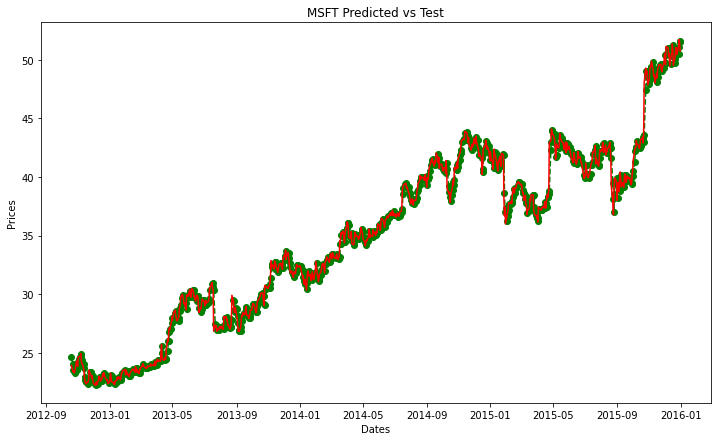

In [16]:
#plot test-data and predicted prices (visual noise-checking)
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted prices')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('{} Predicted vs Test'.format(ticker))
plt.xlabel('Dates')
plt.ylabel('Prices')
